### Import Libarieris

In [63]:
import numpy as np
import random
import torch
import gym
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

### Environment Lunar Lander v2

In [64]:
# Set logging threshold on current logger to 40. Errors only
#DEBUG = 10, INFO = 20, WARN = 30, ERROR = 40, DISABLED = 50

gym.logger.set_level(40)
is_ipython = 'inline' in plt.get_backend()
if is_ipython:
    from IPython import display
plt.ion()

In [65]:
# Load lunar lander
env = gym.make('LunarLander-v2')
env.seed(0)

# From Lunar lander environment we retreive the action space and state space
# Lunar has 4 actions:  0 = nothin, 1 = fire left orientation engine, 2 = fire right orientation engine,, 4 = fire main engine
# Let's confirm this by accessing environemnt action_space
actions=env.action_space.n
print('------------------------------------') 
print("Number of actions: ",actions)
# possible states
# State has 8 components: horizontal and vertical position, horizontal and vertical velocity, angle and angular velocity, 
# and left and right leg contact
# Let's confirm this by accessing environemnt observation_space
states=env.observation_space.shape
print("Number of States : ",states)
print('------------------------------------') 

------------------------------------
Number of actions:  4
Number of States :  (8,)
------------------------------------


### Hyper-Parameter

In [66]:
# Hyper-Parameters

totalTrainingEpisodes=1500         # Maximum number of training episodes
maxSteps=1000                      # Maximum number of timesteps per episode
maxEpsilon=0.99                    # Maximum exploration probability - maximum Epsilon (This will be set at start of learning)
minEpsilon=0.01                    # Minimum exploration probability - minimum Epsilon
decay=0.005                        # Decay rate for epsilon
TAU = 1e-3                         # Update the target by tau

print('------------------------------------') 
print('Hyper-Parameters added ...')
print('------------------------------------') 

------------------------------------
Hyper-Parameters added ...
------------------------------------


### Watch a video of untrained agent

In [ ]:
from dqn_agent import DqnAgent
agent = DqnAgent(state_size=8, action_size=4, seed=0)
# watch an untrained agent
state = env.reset()
for j in range(100):
    action = agent.act(state)
    env.render()
    state, reward, done, _ = env.step(action)
    if done:
        break 
        
env.close()

### Deep Q-learning (DQN)

In [6]:
# Training agent
# Experiment 1: Linear Epsilon Decay

# Load the DQN Agent
from dqn_agent import DqnAgent
agent = DqnAgent(state_size=8, action_size=4, seed=0, fc1_size=64, fc2_size=64, tau=TAU)

dqnScoresExp1 = []                      # List of DQN scores
dqnScoresAvgExp1 = []                   # list of average scores
lastScores = deque(maxlen=100)           
epsilon = maxEpsilon                    
    
for episode in range(1, totalTrainingEpisodes+1):
    state = env.reset()                # Resets the environment
    score = 0                          # Initiate score
    for i in range(maxSteps):          # Loop to maximum steps
        action = agent.act(state, epsilon)
        newState, reward, done, _ = env.step(action) # Extracting next state and reward from action
        agent.step(state, action, reward, newState, done)
        state = newState               # State is Updated to new state
        score += reward
        if done:                       # Check if Episode is Finished
            break 

    lastScores.append(score)       
    dqnScoresExp1.append(score)              
    dqnScoresAvgExp1.append(sum(dqnScoresExp1) / len(dqnScoresExp1))

    # Experiment 1: Linear Epsilon Decay
    epsilon = max(minEpsilon, (1-decay)*epsilon)

    # Display report for the training. IT will stop once the average of last 100 episode in +200
    print('\rEpisode {}\tAverage Score: {:.2f}'.format(episode, np.mean(lastScores)), end="")
    if episode % 100 == 0:
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(episode, np.mean(lastScores)))
    if np.mean(lastScores)>=200.0:
        print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(episode-100, np.mean(lastScores)))
        torch.save(agent.qnetwork_local.state_dict(), 'models/DQN_Model_Exp1_final.pth') # save model
        break

Episode 100	Average Score: -172.25
Episode 200	Average Score: -149.08
Episode 300	Average Score: -51.863
Episode 400	Average Score: -11.26
Episode 500	Average Score: -41.99
Episode 600	Average Score: -9.327
Episode 700	Average Score: 14.79
Episode 800	Average Score: 18.73
Episode 900	Average Score: 130.75
Episode 1000	Average Score: 179.04
Episode 1100	Average Score: 185.09
Episode 1200	Average Score: 184.26
Episode 1236	Average Score: 200.99
Environment solved in 1136 episodes!	Average Score: 200.99


In [7]:
# Training agent
# Experiment 2: Exp Epsilon Decay

# Load the DQN Agent
from dqn_agent import DqnAgent
agent = DqnAgent(state_size=8, action_size=4, seed=0, fc1_size=64, fc2_size=64, tau=TAU)

dqnScoresExp2 = []                     # List of DQN scores
dqnScoresAvgExp2 = []                  # list of average scores
lastScores = deque(maxlen=100)             
epsilon = maxEpsilon                    
    
for episode in range(1, totalTrainingEpisodes+1):
    state = env.reset()                # Resets the environment
    score = 0                          # Initiate score
    for i in range(maxSteps):          # Loop to maximum steps
        action = agent.act(state, epsilon)
        newState, reward, done, _ = env.step(action) # Extracting next state and reward from action
        agent.step(state, action, reward, newState, done)
        state = newState               # State is Updated to new state
        score += reward
        if done:                       # Check if Episode is Finished
            break 

    lastScores.append(score)       
    dqnScoresExp2.append(score)              
    dqnScoresAvgExp2.append(sum(dqnScoresExp2) / len(dqnScoresExp2))
    
    # Experiment 2: Exp Epsilon Decay
    epsilon=minEpsilon+(maxEpsilon-minEpsilon)*np.exp(-decay*episode)

    # Display report for the training. IT will stop once the average of last 100 episode in +200
    print('\rEpisode {}\tAverage Score: {:.2f}'.format(episode, np.mean(lastScores)), end="")
    if episode % 100 == 0:
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(episode, np.mean(lastScores)))
    if np.mean(lastScores)>=200.0:
        print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(episode-100, np.mean(lastScores)))
        torch.save(agent.qnetwork_local.state_dict(), 'models/DQN_Model_Exp2_final.pth') # save model
        break

Episode 100	Average Score: -162.12
Episode 200	Average Score: -121.93
Episode 300	Average Score: -32.690
Episode 400	Average Score: 13.908
Episode 500	Average Score: 133.87
Episode 600	Average Score: 143.90
Episode 682	Average Score: 200.09
Environment solved in 582 episodes!	Average Score: 200.09


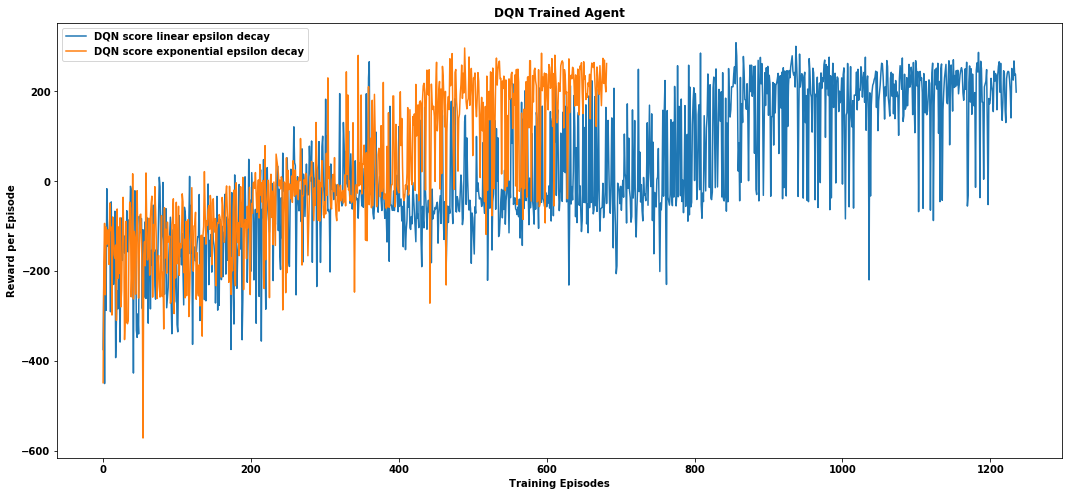

In [60]:
# Training scores plot

fig = plt.figure(figsize=(18,8))
#ax = fig.add_subplot(111)
plt.plot(dqnScoresExp1)
plt.plot(dqnScoresExp2)
plt.ylabel('Reward per Episode')
plt.xlabel('Training Episodes')
plt.title('DQN Trained Agent')
plt.legend(["DQN score linear epsilon decay", "DQN score exponential epsilon decay"])
plt.show()
fig.savefig('DQN.png')

###  Double Deep Q-Network  (DDQN)

In [9]:
# Training agent
# Experiment 1: Linear Epsilon Decay

# Load the Double DQN Agent
from double_dqn_agent import doubleDqnAgent
agent = doubleDqnAgent(state_size=8, action_size=4, seed=0, fc1_size=64, fc2_size=64, tau=TAU)

doubleDqnScoresExp1 = []               # List of Double DQN scores
doubleDqnScoresAvgExp1 = []            # list of average scores
lastScores = deque(maxlen=100)          
epsilon = maxEpsilon                    
    
for episode in range(1, totalTrainingEpisodes+1):
    state = env.reset()                # Resets the environment
    score = 0                          # Initiate score
    for i in range(maxSteps):          # Loop to maximum steps
        action = agent.act(state, epsilon)
        newState, reward, done, _ = env.step(action) # Extracting next state and reward from action
        agent.step(state, action, reward, newState, done)
        state = newState               # State is Updated to new state
        score += reward
        if done:                       # Check if Episode is Finished
            break 

    lastScores.append(score)       
    doubleDqnScoresExp1.append(score)              
    doubleDqnScoresAvgExp1.append(sum(doubleDqnScoresExp1) / len(doubleDqnScoresExp1))

    # Experiment 1: Linear Epsilon Decay
    epsilon = max(minEpsilon, (1-decay)*epsilon)

    # Display report for the training. IT will stop once the average of last 100 episode in +200
    print('\rEpisode {}\tAverage Score: {:.2f}'.format(episode, np.mean(lastScores)), end="")
    if episode % 100 == 0:
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(episode, np.mean(lastScores)))
    if np.mean(lastScores)>=200.0:
        print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(episode-100, np.mean(lastScores)))
        torch.save(agent.qnetwork_local.state_dict(), 'models/Double_DQN_Model_Exp1_final.pth') # save model
        break

Episode 100	Average Score: -169.69
Episode 200	Average Score: -122.25
Episode 300	Average Score: -72.436
Episode 400	Average Score: -25.03
Episode 500	Average Score: 64.188
Episode 600	Average Score: 144.31
Episode 700	Average Score: 169.47
Episode 800	Average Score: 183.45
Episode 900	Average Score: 162.86
Episode 1000	Average Score: 190.43
Episode 1033	Average Score: 200.17
Environment solved in 933 episodes!	Average Score: 200.17


In [10]:
# Training agent
# Experiment 2: Exp Epsilon Decay

# Load the Double DQN Agent
from double_dqn_agent import doubleDqnAgent
agent = doubleDqnAgent(state_size=8, action_size=4, seed=0, fc1_size=64, fc2_size=64, tau=TAU)

doubleDqnScoresExp2 = []               # List of Double DQN scores
doubleDqnScoresAvgExp2 = []            # list of average scores
lastScores = deque(maxlen=100)           
epsilon = maxEpsilon                  
    
for episode in range(1, totalTrainingEpisodes+1):
    state = env.reset()                # Resets the environment
    score = 0                          # Initiate score
    for i in range(maxSteps):          # Loop to maximum steps
        action = agent.act(state, epsilon)
        newState, reward, done, _ = env.step(action) # Extracting next state and reward from action
        agent.step(state, action, reward, newState, done)
        state = newState               # State is Updated to new state
        score += reward
        if done:                       # Check if Episode is Finished
            break 

    lastScores.append(score)       
    doubleDqnScoresExp2.append(score)              
    doubleDqnScoresAvgExp2.append(sum(doubleDqnScoresExp2) / len(doubleDqnScoresExp2))

    # Experiment 2: Exp Epsilon Decay
    epsilon=minEpsilon+(maxEpsilon-minEpsilon)*np.exp(-decay*episode)
    
    # Display report for the training. IT will stop once the average of last 100 episode in +200
    print('\rEpisode {}\tAverage Score: {:.2f}'.format(episode, np.mean(lastScores)), end="")
    if episode % 100 == 0:
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(episode, np.mean(lastScores)))
    if np.mean(lastScores)>=200.0:
        print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(episode-100, np.mean(lastScores)))
        torch.save(agent.qnetwork_local.state_dict(), 'models/Double_DQN_Model_Exp2_final.pth') # save model
        break

Episode 100	Average Score: -175.08
Episode 200	Average Score: -119.14
Episode 300	Average Score: -63.028
Episode 400	Average Score: 14.763
Episode 500	Average Score: 75.60
Episode 600	Average Score: 158.19
Episode 657	Average Score: 201.44
Environment solved in 557 episodes!	Average Score: 201.44


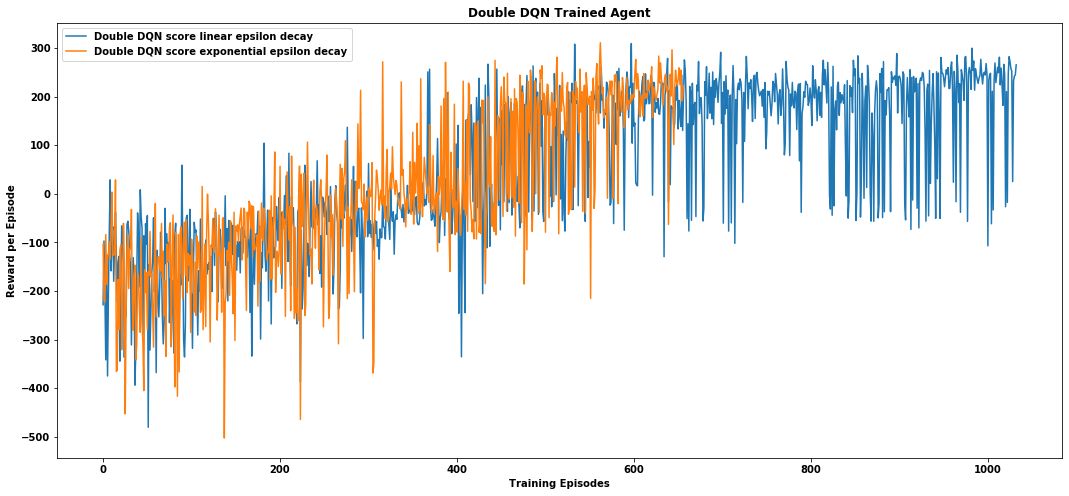

In [61]:
# Training scores plot

fig = plt.figure(figsize=(18,8))
plt.plot(doubleDqnScoresExp1)
plt.plot(doubleDqnScoresExp2)
plt.ylabel('Reward per Episode')
plt.xlabel('Training Episodes')
plt.title('Double DQN Trained Agent')
plt.legend(["Double DQN score linear epsilon decay", "Double DQN score exponential epsilon decay"])
plt.show()
fig.savefig('DoubleDqn.png')

### Dueling Double Deep Q-Network  (DDDQN)

In [12]:
# Training agent
# Experiment 1: Linear Epsilon Decay

# Load the Dueling Double DQN Agent
from dddqn_agent import dddqnAgent
agent = dddqnAgent(state_size=8, action_size=4, seed=0)

dddqnScoresExp1 = []                   # List of Dueling Double DQN scores
dddqnScoresAvgExp1 = []                # list of average scores
lastScores = deque(maxlen=100)         
epsilon = maxEpsilon                    
    
for episode in range(1, totalTrainingEpisodes+1):
    state = env.reset()                # Resets the environment
    score = 0                          # Initiate score
    for i in range(maxSteps):          # Loop to maximum steps
        action = agent.act(state, epsilon)
        newState, reward, done, _ = env.step(action) # Extracting next state and reward from action
        agent.step(state, action, reward, newState, done)
        state = newState               # State is Updated to new state
        score += reward
        if done:                       # Check if Episode is Finished
            break 

    lastScores.append(score)       
    dddqnScoresExp1.append(score)              
    dddqnScoresAvgExp1.append(sum(dddqnScoresExp1) / len(dddqnScoresExp1))

    # Experiment 1: Linear Epsilon Decay
    epsilon = max(minEpsilon, (1-decay)*epsilon)

    # Display report for the training. IT will stop once the average of last 100 episode in +200
    print('\rEpisode {}\tAverage Score: {:.2f}'.format(episode, np.mean(lastScores)), end="")
    if episode % 100 == 0:
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(episode, np.mean(lastScores)))
    if np.mean(lastScores)>=200.0:
        print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(episode-100, np.mean(lastScores)))
        torch.save(agent.qnetwork_local.state_dict(), 'models/Duel_DDQN_Model_Exp1_final.pth') # save model
        break

Episode 100	Average Score: -152.28
Episode 200	Average Score: -66.680
Episode 300	Average Score: -12.14
Episode 400	Average Score: 173.85
Episode 423	Average Score: 200.45
Environment solved in 323 episodes!	Average Score: 200.45


In [13]:
# Training agent
# Experiment 2: Exp Epsilon Decay
    
# Load the Dueling Double DQN Agent
from dddqn_agent import dddqnAgent
agent = dddqnAgent(state_size=8, action_size=4, seed=0)

dddqnScoresExp2 = []                   # List of Dueling Double DQN scores
dddqnScoresAvgExp2 = []                # list of average scores
lastScores = deque(maxlen=100)           
epsilon = maxEpsilon                   
    
for episode in range(1, totalTrainingEpisodes+1):
    state = env.reset()                # Resets the environment
    score = 0                          # Initiate score
    for i in range(maxSteps):          # Loop to maximum steps
        action = agent.act(state, epsilon)
        newState, reward, done, _ = env.step(action) # Extracting next state and reward from action
        agent.step(state, action, reward, newState, done)
        state = newState               # State is Updated to new state
        score += reward
        if done:                       # Check if Episode is Finished
            break 

    lastScores.append(score)       
    dddqnScoresExp2.append(score)              
    dddqnScoresAvgExp2.append(sum(dddqnScoresExp2) / len(dddqnScoresExp2))
    
    # Experiment 2: Exp Epsilon Decay
    epsilon=minEpsilon+(maxEpsilon-minEpsilon)*np.exp(-decay*episode)

    # Display report for the training. IT will stop once the average of last 100 episode in +200
    print('\rEpisode {}\tAverage Score: {:.2f}'.format(episode, np.mean(lastScores)), end="")
    if episode % 100 == 0:
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(episode, np.mean(lastScores)))
    if np.mean(lastScores)>=200.0:
        print('\n\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(episode-100, np.mean(lastScores)))
        torch.save(agent.qnetwork_local.state_dict(), 'models/Duel_DDQN_Model_Exp2_final.pth') # save model
        break

Episode 100	Average Score: -151.60
Episode 200	Average Score: -63.637
Episode 300	Average Score: 16.459
Episode 398	Average Score: 200.09
Environment solved in 298 episodes!	Average Score: 200.09


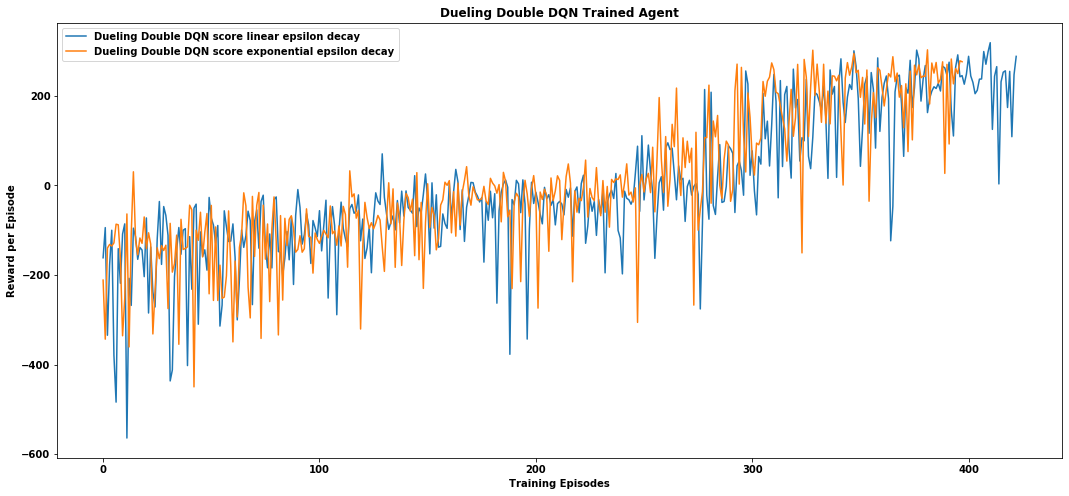

In [62]:
# Training scores plot

fig = plt.figure(figsize=(18,8))
plt.plot(dddqnScoresExp1)
plt.plot(dddqnScoresExp2)
plt.ylabel('Reward per Episode')
plt.xlabel('Training Episodes')
plt.title('Dueling Double DQN Trained Agent')
plt.legend(["Dueling Double DQN score linear epsilon decay", "Dueling Double DQN score exponential epsilon decay"])
plt.show()
fig.savefig('DuellingDDQN.png')

### Load Dueling Double DQN Trained Agent to play Lunar Lander v2

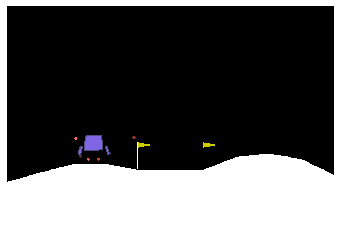

In [34]:
# This is a video for our best agent
# load the weights from file
agent.qnetwork_local.load_state_dict(torch.load('models/Duel_DDQN_Model_Exp2_final.pth', map_location=lambda storage, loc: storage))
for i in range(3):
    state = env.reset()
    img = plt.imshow(env.render(mode='rgb_array'))
    for j in range(500):
        action = agent.act(state)
        img.set_data(env.render(mode='rgb_array')) 
        plt.axis('off')
        display.display(plt.gcf())
        display.clear_output(wait=True)
        state, reward, done, _ = env.step(action)
        if done:
            break           
env.close()

### Agent Performance with differnet algorithms plots

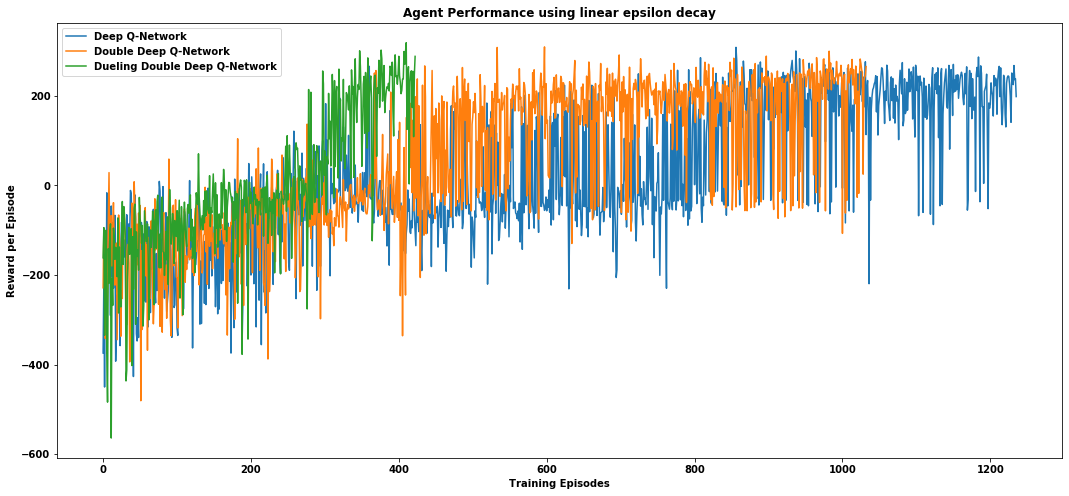

In [59]:
fig = plt.figure(figsize=(18,8))
plt.plot(dqnScoresExp1)
plt.plot(doubleDqnScoresExp1)
plt.plot(dddqnScoresExp1)
plt.ylabel('Reward per Episode')
plt.xlabel('Training Episodes')
plt.title('Agent Performance using linear epsilon decay')
plt.legend(["Deep Q-Network", "Double Deep Q-Network", "Dueling Double Deep Q-Network"])
plt.show()
fig.savefig('finalAgentsComparisonExp1.png')

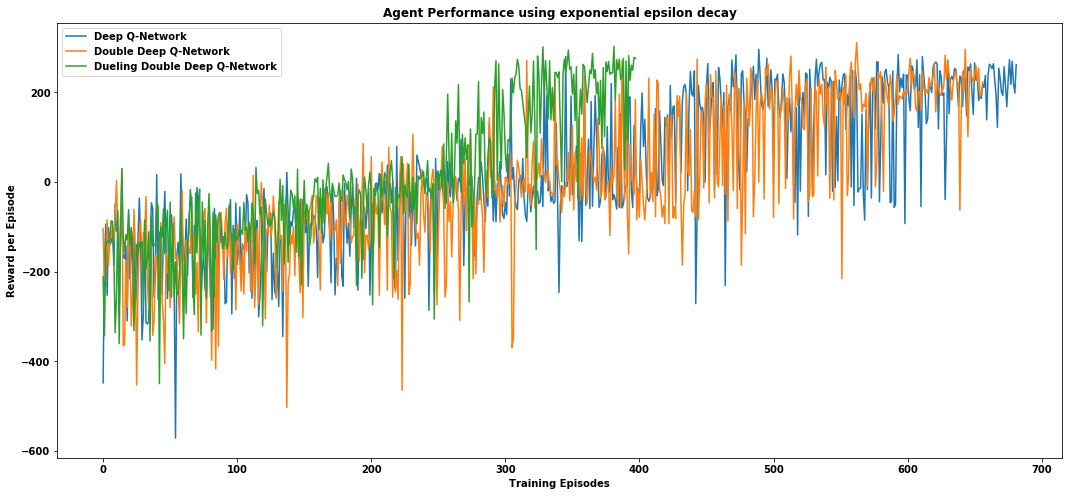

In [58]:
fig = plt.figure(figsize=(18,8))
plt.plot(dqnScoresExp2)
plt.plot(doubleDqnScoresExp2)
plt.plot(dddqnScoresExp2)
plt.ylabel('Reward per Episode')
plt.xlabel('Training Episodes')
plt.title('Agent Performance using exponential epsilon decay')
plt.legend(["Deep Q-Network", "Double Deep Q-Network", "Dueling Double Deep Q-Network"])
plt.show()
fig.savefig('finalAgentsComparisonExp2.png')

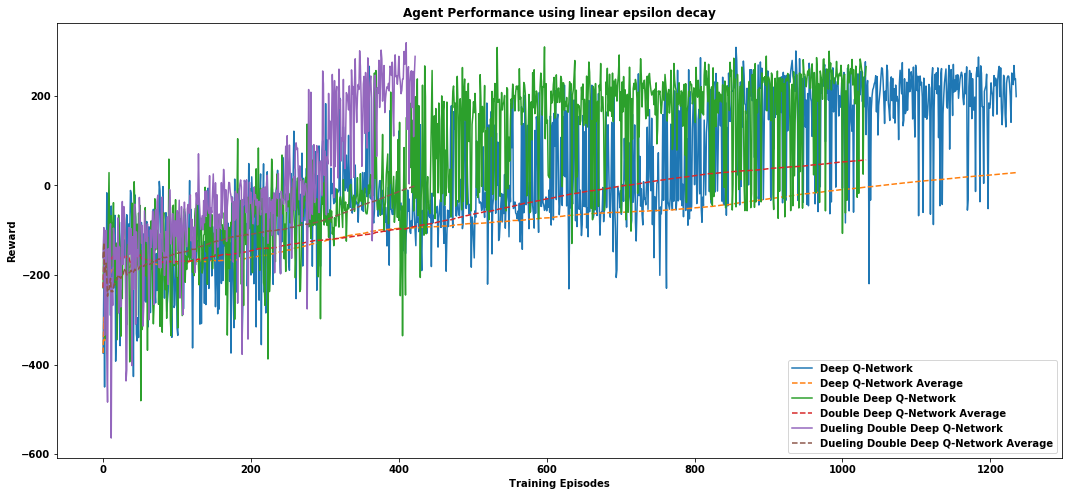

In [57]:
fig = plt.figure(figsize=(18,8))
plt.plot(dqnScoresExp1)
plt.plot(dqnScoresAvgExp1, '--')
plt.plot(doubleDqnScoresExp1)
plt.plot(doubleDqnScoresAvgExp1, '--')
plt.plot(dddqnScoresExp1)
plt.plot(dddqnScoresAvgExp1, '--')
plt.ylabel('Reward')
plt.xlabel('Training Episodes')
plt.title('Agent Performance using linear epsilon decay')
plt.legend(["Deep Q-Network", "Deep Q-Network Average", "Double Deep Q-Network", "Double Deep Q-Network Average", "Dueling Double Deep Q-Network", "Dueling Double Deep Q-Network Average"])
plt.show()
fig.savefig('finalAgentsComparisonAllExp1.png')

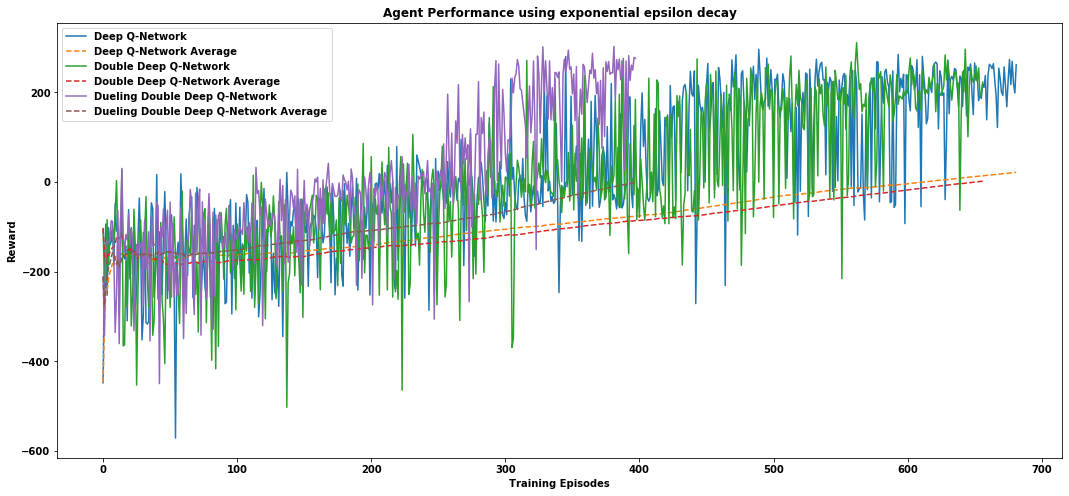

In [56]:
fig = plt.figure(figsize=(18,8))
plt.plot(dqnScoresExp2)
plt.plot(dqnScoresAvgExp2, '--')
plt.plot(doubleDqnScoresExp2)
plt.plot(doubleDqnScoresAvgExp2, '--')
plt.plot(dddqnScoresExp2)
plt.plot(dddqnScoresAvgExp2, '--')
plt.ylabel('Reward')
plt.xlabel('Training Episodes')
plt.title('Agent Performance using exponential epsilon decay')
plt.legend(["Deep Q-Network", "Deep Q-Network Average", "Double Deep Q-Network", "Double Deep Q-Network Average", "Dueling Double Deep Q-Network", "Dueling Double Deep Q-Network Average"])
plt.show()
fig.savefig('finalAgentsComparisonAllExp2.png')

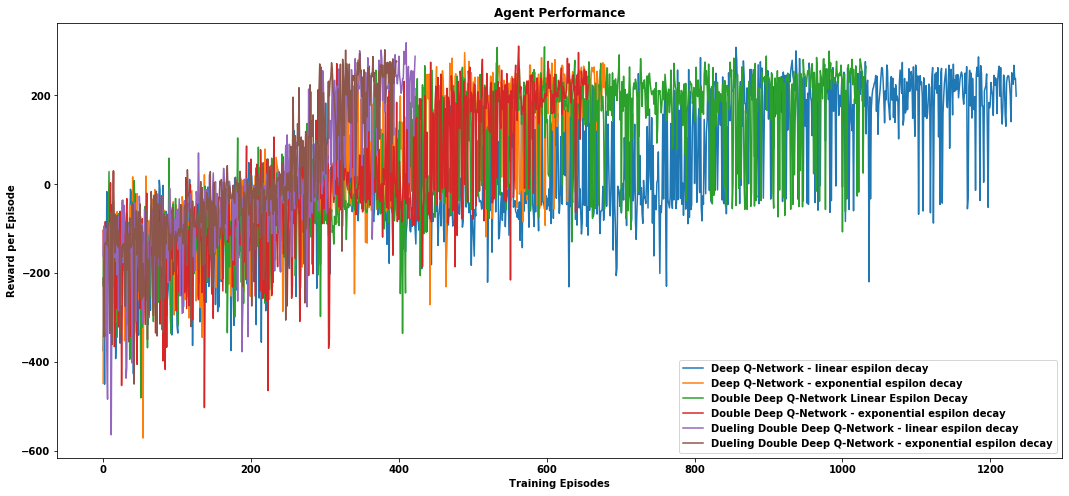

In [55]:
fig = plt.figure(figsize=(18,8))
plt.plot(dqnScoresExp1)
plt.plot(dqnScoresExp2)
plt.plot(doubleDqnScoresExp1)
plt.plot(doubleDqnScoresExp2)
plt.plot(dddqnScoresExp1)
plt.plot(dddqnScoresExp2)
plt.ylabel('Reward per Episode')
plt.xlabel('Training Episodes')
plt.title('Agent Performance')
plt.legend(["Deep Q-Network - linear espilon decay", "Deep Q-Network - exponential espilon decay", "Double Deep Q-Network Linear Espilon Decay", "Double Deep Q-Network - exponential espilon decay", "Dueling Double Deep Q-Network - linear espilon decay", "Dueling Double Deep Q-Network - exponential espilon decay"])
plt.show()
fig.savefig('finalAgentsComparisonAllExp1Exp2.png')

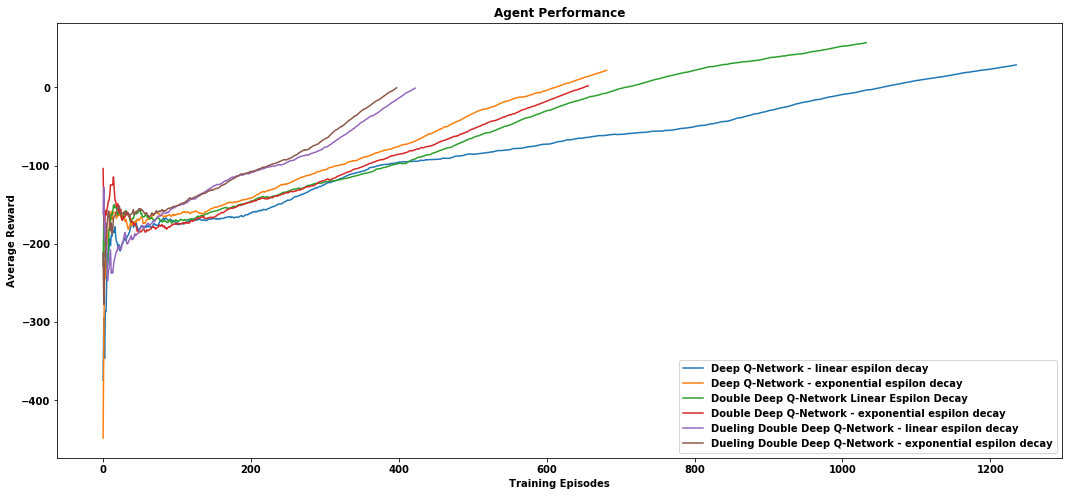

In [54]:
fig = plt.figure(figsize=(18,8))
plt.plot(dqnScoresAvgExp1)
plt.plot(dqnScoresAvgExp2)
plt.plot(doubleDqnScoresAvgExp1)
plt.plot(doubleDqnScoresAvgExp2)
plt.plot(dddqnScoresAvgExp1)
plt.plot(dddqnScoresAvgExp2)
plt.ylabel('Average Reward')
plt.xlabel('Training Episodes')
plt.title('Agent Performance')
plt.legend(["Deep Q-Network - linear espilon decay", "Deep Q-Network - exponential espilon decay", "Double Deep Q-Network Linear Espilon Decay", "Double Deep Q-Network - exponential espilon decay", "Dueling Double Deep Q-Network - linear espilon decay", "Dueling Double Deep Q-Network - exponential espilon decay"])
plt.show()
fig.savefig('finalAgentsComparisonAvg.png')